## How does modeled ERA5 climate data compare to SnowEx measurements?   

### Variables of interest:

- 2m_temperature
- snow_albedo
- snow_density
- snow_depth
- snow_depth_water_equivalent
- temperature_of_snow_layer
- total_precipitation   


In this example we will pull in the [ERA5-Land hourly data from 1981 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=form)  

<p align="center">
<img src="https://datastore.copernicus-climate.eu/c3s/published-forms/c3sprod/reanalysis-era5-land/overview.png" width=300>   
</p>

| DATA DESCRIPTION  |  |
| ------------- | ------------- |
| **Data type**  | Gridded |
| **Projection**  | Regular latitude-longitude grid |
| **Horizontal coverage**  | Global |
| **Horizontal resolution**  | 0.1° x 0.1°; Native resolution is 9 km. |
| **Vertical coverage**  | From 2 m above the surface level, to a soil depth of 289 cm. |
| **Vertical resolution**  | 4 levels of the ECMWF surface model: Layer 1: 0 -7cm, Layer 2: 7 -28cm, Layer 3: 28-100cm, Layer 4: 100-289cm Some parameters are defined at 2 m over the surface. |
| **Temporal coverage**  | January 1981 to present |
| **Temporal resolution**  | Hourly |
| **File format**  | GRIB / NetCDF |
| **Update frequency**  | Monthly with a delay of about three months relatively to actual date. |    

 
Additional products and documentation can be found here:   
[ERA5-Land: documentation](https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation)      
[ERA5-Land monthly averaged data from 1981 to present](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=form)     
[ERA5 monthly averaged data on pressure levels from 1950 to 1978 (preliminary version)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels-monthly-means-preliminary-back-extension?tab=overview)    
[ERA5 hourly data on pressure levels from 1950 to 1978 (preliminary version)](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels-preliminary-back-extension?tab=overview)    


### Install cdsapi
`cdsapi` can be installed with pip.   
https://pypi.org/project/cdsapi/    
Be sure to set your credentials in ~/.cdsapirc   

In [1]:
import cdsapi

In [2]:
c = cdsapi.Client()

### cdsapi API query
Format: NetCDF
Variables:
- 2m_temperature
- snow_albedo
- snow_density
- snow_depth
- snow_depth_water_equivalent
- temperature_of_snow_layer
- total_precipitation   

Time range: Hourly data for February 2020  
Bounds: [39.2, -108.4, 38.8, -107.7]

In [1]:
c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': [
            '2m_temperature', 'snow_albedo', 'snow_density',
            'snow_depth', 'snow_depth_water_equivalent', 'temperature_of_snow_layer',
            'total_precipitation',
        ],
        'year': '2020',
        'month': [
            '01', '02', '03',
        ],
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00',
        ],
        'area': [
            39.2, -108.4, 38.8,
            -107.7,
        ],
    },
    'data/era5_2020-02-01_2020-02-29.nc')

### Read in the data

In [1]:
import xarray as xr
import numpy as np

In [2]:
ds = xr.open_dataset('data/era5_2020-02-01_2020-02-29.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 8, time: 696)
Coordinates:
  * longitude  (longitude) float32 -108.4 -108.3 -108.2 ... -107.9 -107.8 -107.7
  * latitude   (latitude) float32 39.2 39.1 39.0 38.9 38.8
  * time       (time) datetime64[ns] 2020-02-01 ... 2020-02-29T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    asn        (time, latitude, longitude) float32 ...
    rsn        (time, latitude, longitude) float32 ...
    sde        (time, latitude, longitude) float32 ...
    sd         (time, latitude, longitude) float32 ...
    tsn        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2021-07-15 17:43:31 GMT by grib_to_netcdf-2.20.0: /opt/ecmw...

### Check units and variable names

In [4]:
for variable in list(ds.keys()):
    name = ds[variable ].attrs['long_name']
    units = ds[variable ].attrs['units']
    print('('+variable+')', name)
    print('units:', units, '\n')

(t2m) 2 metre temperature
units: K 

(asn) Snow albedo
units: (0 - 1) 

(rsn) Snow density
units: kg m**-3 

(sde) Snow depth
units: m 

(sd) Snow depth
units: m of water equivalent 

(tsn) Temperature of snow layer
units: K 

(tp) Total precipitation
units: m 



### Convert Kelvin to Celcius

In [5]:
ds['t2m'].values = ds['t2m'].values - 273.15
ds['t2m'].attrs['units'] = 'C'
ds['t2m'].attrs['long_name'] = 'Temperature (2 m above surface)'

### Convert from GMT to Mountain Time

In [6]:
ds['time'] = [t - np.timedelta64(6, 'h') for t in ds['time'].values]

### Plot a time series

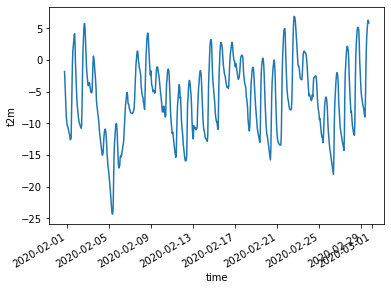

In [7]:
ds['t2m'].mean(dim=('latitude', 'longitude')).plot()

### Plot data from first time stamp

In [8]:
import matplotlib.pyplot as plt

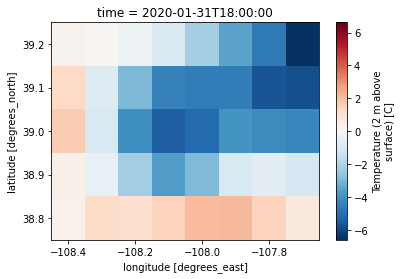

In [9]:
ds['t2m'].isel(time=0).plot()

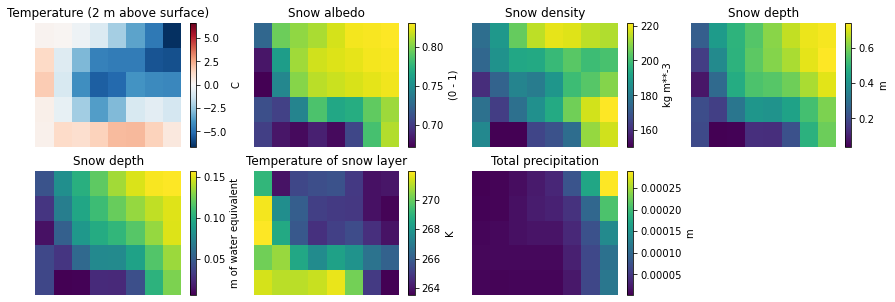

In [10]:
fig = plt.figure(figsize=(15,5))
variables = list(ds.keys())
rows = 2
columns = 4

for i in range(rows*columns):
    try:
        exists = ds[variables[i]]
        ax = plt.subplot(rows, columns, i + 1)
        name = ds[variables[i]].attrs['long_name']
        units = ds[variables[i]].attrs['units']
        ds[variables[i]].isel(time=0).plot(ax=ax,cbar_kwargs={'label':units})
        ax.axis('off')
        ax.set_title(name)
        
    except:
        pass


### Where is the Mesa?

In [11]:
import geopandas as gpd
import contextily as ctx
import pandas as pd

In [12]:
mesa_outline = gpd.read_file('data/grand_mesa_poly.geojson')

Text(0.5, 1.0, 'Grand Mesa outline and temperature at 2020-01-31:18:00:00')

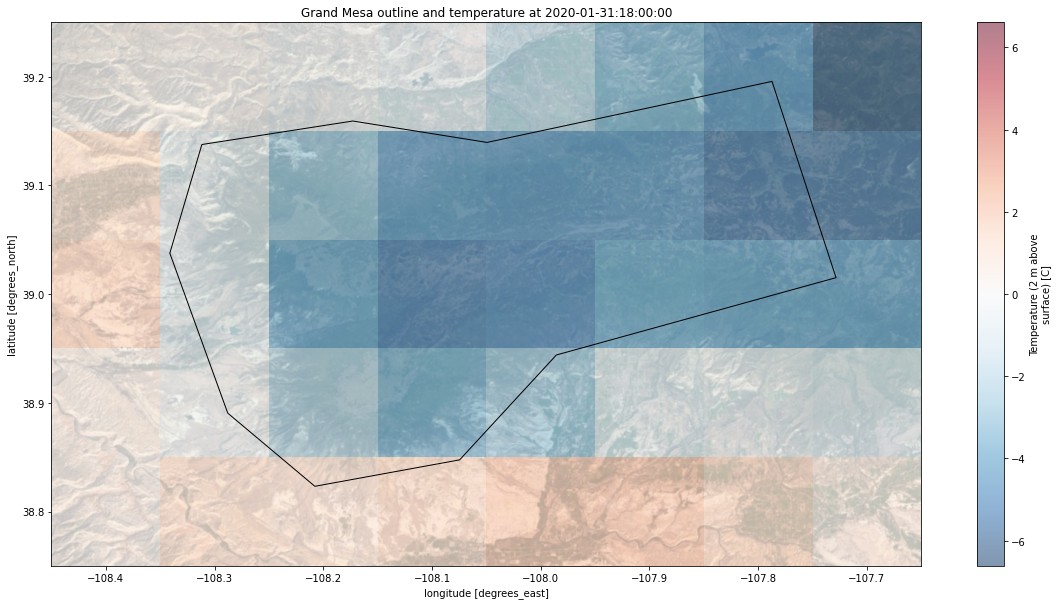

In [13]:
fig,ax = plt.subplots(figsize=(20,10))

ds['t2m'].isel(time=0).plot(ax = ax,alpha=0.5)
mesa_outline.plot(ax = ax,ec='k',fc='none')

time_stamp_string = pd.to_datetime(str(ds['time'].values[0])).strftime('%Y-%m-%d:%H:%M:%S')

ctx.add_basemap(ax,
                alpha=0.5,
                crs = mesa_outline.crs,
                zorder=-1,
                source = "https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}")

ax.set_title('Grand Mesa outline and temperature at '+time_stamp_string)